# Titansoft BA Test
In this file, we will explora a dataset from a mobile game to answer the following questin below:

## Business question
這是一個手機遊戲內抽寶系統的資料，需要請您幫忙解決以下四個問題
### Q1. 你覺得哪些玩家是幸運的玩家？為什麼？

最一開始我很簡單的認為中獎機率最高的一群人就是幸運的玩家，但在看過實際資料後發現大部分中獎機率大於80%的玩家，在整個2022年一月到隔年六月都只有個位數的轉蛋次數，其中90%更是只有一次的花費。 為此，單用高中獎機率來區分幸運與否似乎無法顧及在此期間內有進行大量課金的玩家。比如說, 帳號 0113EE7A55 在 2022五月至2023六月課了81單，中獎機率雖然接近中位數(44%-42%)，但中一次獎平均花費卻只需要17塊新台幣（P50為165TWD），這和與他花費相當卻只有中了37次獎的7B27AAD832來說，0113EE7A55無疑是比較幸運的。

綜上所述為了將這些族群也納入考量，除了中獎機率外，我們也可以看課金次數，中一次獎平均花費，以下為dataset filter方法，threshold 取 overall mean（下方有Code)。

`Q1_df.loc[(Q1_df["中一次獎平均花費"]<=165) & (Q1_df["中獎機率"]>0.43)]`

之前有想過可以使用**寶物總價/花費**來當作指標之一，但發現有出現中獎次數為0，累積寶物總價卻有7877的情況（帳號23C53C86F2）。懷疑是不是於2022年前的寶物也會被算在裡面，所以就不作為幸運值參考了。
  
### Q2. 現在有一筆行銷預算，你會想投資在哪一群人身上？為什麼？

在檢視數據的過程中我們發現使用人民幣和港幣的用戶消費力是相對高的（已將金額都換成ＴＷＤ）：

<img src="eda3.png" style="width: 1000px; hight: 600px" alt="Image description">

順著這個思路在，在使用港元和人民幣的全部2,681位玩家之中，P75的玩家會花費超過13萬元TWD（見圖左）。

基於以下數值，我決定來細看怎麼樣的玩家有這樣的特徵，圖右為消費金額及頻率都高於P75的族群 (為方便觀看，只取了20位用戶於上圖):
<br>
<img src="eda1.png" style="width: 500px; hight: 600px" alt="Image description">
<img src="eda2.png" style="width: 500px; hight: 600px" alt="Image description">

#### A: 2022年曾有大量購買紀錄但2023年沒有的客層：
在總花費金額高於13三萬，累計購買月份超過三個月以及購買次數高於八次的客群中，發現有一部分客層屬於過去一段時間有大額高頻率消費，但日後便沒有的族群。以用戶0A4C312513和CBE1CA65F5為例，該玩家在2022年五月後消費次數和金額都有明顯下降。

<img src="0A4C312513.png" style="width: 500px; hight: 600px" alt="0A4C312513"><img src="CBE1CA65F5.png" style="width: 500px; hight: 600px" alt="CBE1CA65F5">


但在同樣的dataset裡面，我也看到了許多這樣的情況：

<img src="6B5BB34159.png" style="width: 500px; hight: 600px" alt="Image description"><img src="3E41AFEED7.png" style="width: 500px; hight: 600px" alt="Image description">

這代表玩家回鍋並繼續消費的可能性還是很高的，並且這些用戶的花費金額不會低於以前。
我認為我們可以再深入研究一下這些中港回鍋玩家的背景，並且針對這些用戶進行相對應的行銷，或是發起針對老玩家的活動。

### Q3. 你認為整體市場的趨勢是什麼？
雖然沒有更多遊戲公司的資料，但我們也能從這個dataset中窺視到整體市場的趨勢。以下是2022-2023間，該遊戲的玩家的付費次數及總體付費金額。在下一張是首次付費用戶的數量。

我們可以看到三件事：新的付費用戶增加，現有的付費用戶付費頻率增高，玩家的整體花費也有增長。我認為普遍亞洲玩家在遊戲課金上的觀念有變的越來越開放。

<img src="trend.png" style="width: 1000px" alt="Image description">
<img src="trend1.png" style="width: 1000px" alt="Image description">
<br>
其中我們也可以看到，在新增加的玩家之中，小額消費（單筆消費<100TWD）的單數也有增加的趨勢
<br>
<br>
<img src="small_order.png" style="width: 1000px" alt="Image description">

### Q4. 你從資料中還看到什麼？有什麼建議？

我們在Ｑ2中已經知道日本韓國玩家（假設用該幣別的用戶大部分為該國玩家）的消費力是相對低的。
我們也能在大額消費的用戶趨勢圖中發現這樣的情況。
下圖為單筆消費大於三萬台幣的消費筆數，和Q2得出的結論一樣，中港地區的消費力相對高，而大額消費的日韓玩家並不多

<img src="large_amt.png" style="width: 1000px" alt="Image description">

但這並不代表這兩個市場沒有發展的可能性。
如果我們繼續看Q3中提及的小額消費族群，就能發現大部分的小額消費都是經過韓元日圓支付，並且2022-2023年也有持續增長。

<img src="small_amount2.png" style="width: 1000px" alt="Image description">

從長遠的角度來看，我認為發展該遊戲在日韓的玩家族群是有發展的淺力的，只是該如何將這些用戶發展為忠實顧客，或是願意進行大額消費的族群，我在該dataset中還無法得出結論，所以沒有放在Q2的回答中。


# Appendix (Code Section)

In [143]:
import pandas as pd
import numpy as np

from forex_python.converter import CurrencyRates # Convert currency

import warnings
warnings.filterwarnings('ignore')

In [1164]:
# Plot
import plotly.express as px
import dash
from dash import dcc,ㄌ html
from dash.dependencies import Input, Output
from dateutil.relativedelta import relativedelta
import ipywidgets as widgets
from IPython.display import display
import matplotlib.dates as mdates


import matplotlib.pyplot as plt
import seaborn as sns

In [1331]:
# Helper function

# Function to add quantile annotations
def add_quantile_annotations(ax, data):
    quantiles = data.quantile([0.25, 0.5, 0.75])
    colors = ['#FF9999', '#66B2FF', '#99FF99']  # Light red, light blue, light green
    for i, (q, color) in enumerate(zip(['Q1', 'Q2', 'Q3'], colors)):
        ax.annotate(f'{q}: {quantiles.iloc[i]:.2f}', 
                    xy=(0.5, quantiles.iloc[i]),
                    xytext=(0.55, quantiles.iloc[i]), 
                    textcoords='data',
                    ha='left', va='center',
                    bbox=dict(boxstyle="round,pad=0.3", fc=color, ec="black", alpha=0.8),
                    fontsize=10)

# Function to update dropdown options based on text input
def update_dropdown(*args):
    search_str = account_text.value.strip()
    filtered_options = [acc for acc in Q2_df['帳號'].unique() if search_str.lower() in acc.lower()]
    account_dropdown.options = filtered_options

# Function to update the plot based on dropdown selection
def update_plot(account):
    filtered_df = Q2_df[Q2_df['帳號'] == account]
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=filtered_df, x='日期', y='花費金額', marker='o')
    plt.title(f'Time Series Analysis of Spending for Account {account}')
    plt.xlabel('Date')
    plt.ylabel('Spending')
    plt.legend(title='Account')
    plt.show()

In [1345]:
df = pd.read_csv("Titansoft.csv")

## Data Wrangling

We have in total 90386 data points and 8 column, started from 2022-01-01 to 2023-06-30, meaning there are in total 90386 purchase behavior in 18 month. Total of 6812 uniqes accounts is observed. 

In [1349]:
# df.shape
df.head(3)


,日期,帳號,貨幣,轉蛋次數,中獎次數,中獎機率,花費金額,累積寶物總價
0,2022/4/21,9B4A3C3069,CNY,45,25,55.56%,8299,4507
1,2022/11/1,527FA2C4FA,TWD,1657,691,41.70%,159082,50695
2,2022/12/27,52634EC827,TWD,1,1,100.00%,55,21


In [1351]:
df.columns

Index(['日期', '帳號', '貨幣', '轉蛋次數', '中獎次數', '中獎機率', '花費金額', '累積寶物總價'], dtype='object')

In [1586]:
# Convert Currency to TWD
currencies = df.貨幣.unique().tolist()
currencies = {'CNY':4.53, 'TWD':1, 'KRW':0.024, 'HKD':4.2, 'JPY':0.21}

df["花費金額"] = df.apply(lambda row: currencies[row['貨幣']] * row['花費金額'], axis=1)
df["累積寶物總價"] = df.apply(lambda row: currencies[row['貨幣']] * row['累積寶物總價'], axis=1)

df["日期"] = pd.to_datetime(df["日期"]) #change datatpe
df["寶物總價/花費"] = df["累積寶物總價"]/df["花費金額"] #examine ROI

# Turn 中獎機率 into float
df["中獎機率"] = df["中獎次數"]/df["轉蛋次數"]

In [1355]:
df.head(3)

,日期,帳號,貨幣,轉蛋次數,中獎次數,中獎機率,花費金額,累積寶物總價,寶物總價/花費
0,2022-04-21,9B4A3C3069,CNY,45,25,0.555556,37594.47,20416.71,0.543077
1,2022-11-01,527FA2C4FA,TWD,1657,691,0.417019,159082.00,50695.00,0.318672
2,2022-12-27,52634EC827,TWD,1,1,1.000000,55.00,21.00,0.381818


## Q1



In [1359]:
Q1_df = df.groupby('帳號').agg(
    轉蛋次數合計=('轉蛋次數', 'sum'),
    中獎次數合計=('中獎次數', 'sum'),
    花費金額合計=('花費金額', 'sum'),
    累積寶物總價合計=('累積寶物總價', 'sum'),
    first_pay_date=('日期', 'min'),
    last_pay_date=('日期', 'max'),
    課金次數=('帳號', 'count') 
).reset_index()


In [1361]:
Q1_df["寶物總價/花費"] = Q1_df["累積寶物總價合計"]/Q1_df["花費金額合計"] 
Q1_df["中獎機率"] =Q1_df["中獎次數合計"]/Q1_df["轉蛋次數合計"]
Q1_df['累計月份'] = Q1_df.apply(
    lambda row: relativedelta(row['last_pay_date'], row['first_pay_date']).months + 
                12 * relativedelta(row['last_pay_date'], row['first_pay_date']).years, axis=1
)

In [1362]:
Q1_df["中一次獎平均花費"] = Q1_df['花費金額合計']/Q1_df['中獎次數合計']
Q1_df["中一次獎平均花費"] = Q1_df["中一次獎平均花費"].replace(np.inf, 0)

In [1365]:
Q1_df.loc[(Q1_df["中獎機率"]>0.8)].groupby("課金次數").count()

,帳號,轉蛋次數合計,中獎次數合計,花費金額合計,累積寶物總價合計,first_pay_date,last_pay_date,寶物總價/花費,中獎機率,累計月份,中一次獎平均花費
課金次數,,,,,,,,,,,
1,188,188,188,188,188,188,188,188,188,188,188
2,16,16,16,16,16,16,16,16,16,16,16
3,4,4,4,4,4,4,4,4,4,4,4
4,1,1,1,1,1,1,1,1,1,1,1


In [1469]:
# mean of 中獎機率
print("Total Account: ", Q1_df["帳號"].count())
print()
print("中獎機率 Mean: ", Q1_df["中獎機率"].mean())
print("中獎機率 Median: ", Q1_df["中獎機率"].quantile(0.5))
print()
print("中一次獎平均花費 Mean: ", Q1_df["中一次獎平均花費"].mean())
print("中一次獎平均花費 Median: ", Q1_df["中一次獎平均花費"].quantile(0.5))
print()
print("課金次數 Mean: ", Q1_df["課金次數"].mean())
print("課金次數 Median: ", Q1_df["課金次數"].quantile(0.5))
print()
print("寶物總價/花費 Mean: ", Q1_df["寶物總價/花費"].mean())
print("寶物總價/花費 Median: ", Q1_df["寶物總價/花費"].quantile(0.5))

Total Account:  6812

中獎機率 Mean:  0.3811625166827419
中獎機率 Median:  0.42141952241876995

中一次獎平均花費 Mean:  1506.5819463742978
中一次獎平均花費 Median:  165.34556784534112

課金次數 Mean:  13.268643570170287
課金次數 Median:  2.0

寶物總價/花費 Mean:  0.27662358477487586
寶物總價/花費 Median:  0.2688249544580508


In [1369]:
Q1_df.loc[(Q1_df["中一次獎平均花費"]<=165) & (Q1_df["中獎機率"]>0.43)]

,帳號,轉蛋次數合計,中獎次數合計,花費金額合計,累積寶物總價合計,first_pay_date,last_pay_date,課金次數,寶物總價/花費,中獎機率,累計月份,中一次獎平均花費
0,0002BB7D3C,1908,860,94549.770,40809.300,2022-11-19,2023-06-11,47,0.431617,0.450734,6,109.941593
6,002FD0A1CD,3,2,33.600,13.440,2023-02-25,2023-02-25,1,0.400000,0.666667,0,16.800000
12,00558E681A,2,2,54.600,35.700,2023-01-03,2023-01-03,1,0.653846,1.000000,0,27.300000
15,009AB411BE,425,205,32088.000,9209.000,2022-11-27,2022-11-30,3,0.286992,0.482353,0,156.526829
20,00DB8C23B9,11,7,13.464,3.936,2023-06-16,2023-06-16,1,0.292335,0.636364,0,1.923429
...,...,...,...,...,...,...,...,...,...,...,...,...
6766,FE0E098465,3602,1636,126262.290,48660.780,2022-12-24,2023-06-28,125,0.385394,0.454192,6,77.177439
6774,FE82C86CA2,32,17,140.640,50.544,2022-10-23,2022-10-23,1,0.359386,0.531250,0,8.272941
6781,FED0A1DA7C,2,2,16.800,3.570,2023-04-09,2023-04-09,1,0.212500,1.000000,0,8.400000
6782,FEE25D58D8,35,16,308.910,41.790,2023-06-13,2023-06-13,1,0.135282,0.457143,0,19.306875


In [1371]:
# ID 23C53C86F2 is a interesting case, we will treat this as the outlier as 
# there is no win but still have in game asset
df.loc[df["帳號"]=="23C53C86F2"]

,日期,帳號,貨幣,轉蛋次數,中獎次數,中獎機率,花費金額,累積寶物總價,寶物總價/花費
71192,2023-05-02,23C53C86F2,CNY,1,0,0.0,135.9,7877.67,57.966667


## Q2

In [1374]:
Q2_df = df.copy()
Q2_df.head(2)

,日期,帳號,貨幣,轉蛋次數,中獎次數,中獎機率,花費金額,累積寶物總價,寶物總價/花費
0,2022-04-21,9B4A3C3069,CNY,45,25,0.555556,37594.47,20416.71,0.543077
1,2022-11-01,527FA2C4FA,TWD,1657,691,0.417019,159082.00,50695.00,0.318672


In [1460]:
Q2_df2 = Q2_df.copy()
Q2_df2  = Q2_df2[(Q2_df2["貨幣"]=="CNY")|(Q2_df2["貨幣"]=="HKD")]

Q2_df2 = Q2_df2.groupby("帳號").agg(
    購買次數=("帳號", "count"),
    總花費金額=("花費金額", "sum"), 
    轉蛋次數合計=('轉蛋次數', 'sum'),
    first_pay_date = ("日期", "min"),
    last_pay_date = ("日期", "max")
).reset_index()

Q2_df2['累計月份'] = Q2_df2.apply(
    lambda row: relativedelta(row['last_pay_date'], row['first_pay_date']).months + 
                12 * relativedelta(row['last_pay_date'], row['first_pay_date']).years, axis=1
)

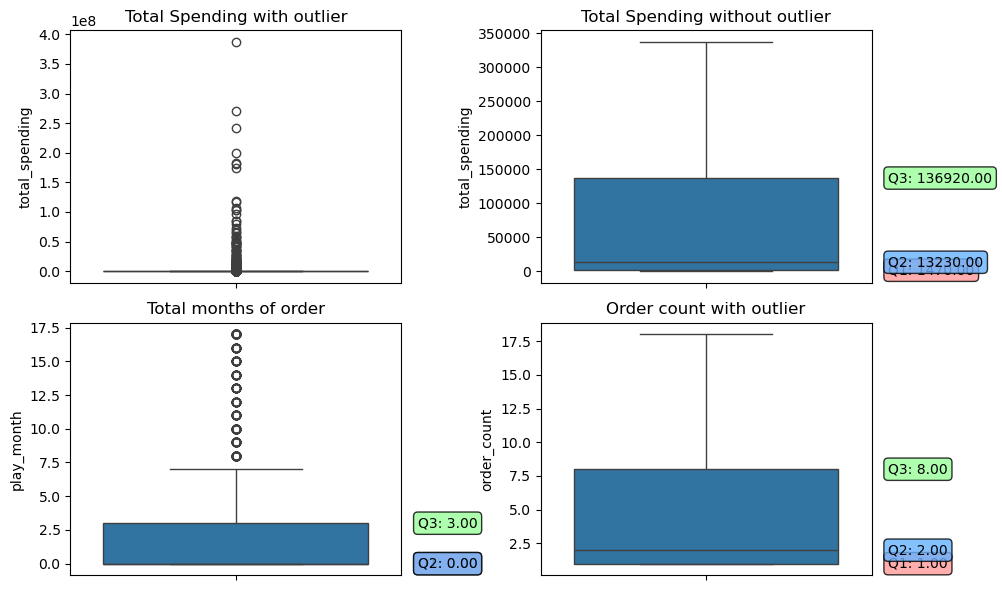

In [1552]:
a = Q2_df2.rename(columns={'帳號': 'account', '購買次數': 'order_count', "總花費金額":"total_spending",
                          "轉蛋次數合計":"loot_count", "累計月份":"play_month" })

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.boxplot(data = a["total_spending"], ax=axes[0, 0])
axes[0, 0].set_title('Total Spending with outlier')

sns.boxplot(data = a["total_spending"], showfliers=False, ax=axes[0, 1])
axes[0,1].set_title('Total Spending without outlier')
add_quantile_annotations(axes[0, 1], a["total_spending"])


sns.boxplot(data = a["play_month"], ax=axes[1, 0])
axes[1,0].set_title('Total months of order')
add_quantile_annotations(axes[1, 0], a["play_month"])

sns.boxplot(data = a["order_count"], ax=axes[1, 1],showfliers=False)
axes[1,1].set_title('Order count with outlier')
add_quantile_annotations(axes[1, 1], a["order_count"])


fig.tight_layout()
plt.show()

In [1478]:
print("Total Account: ", Q2_df2["帳號"].count())


Total Account:  2681


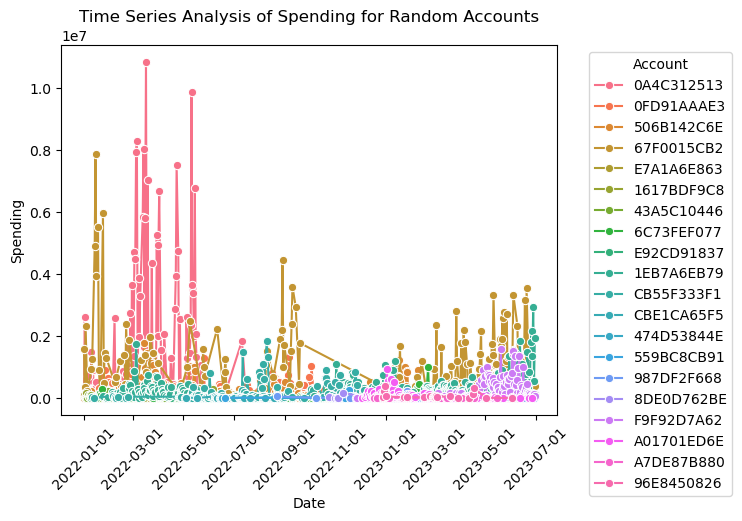

In [1464]:
# Get 購買頻率高+花費大＋的人
b = Q2_df2[(Q2_df2["總花費金額"]>30000) & (Q2_df2["累計月份"]>3) & (Q2_df2["購買次數"]>8)]
random_accounts = b["帳號"].unique().tolist()
random_accounts = pd.Series(random_accounts).sample(n=20, random_state=444).tolist()

c = df[df["帳號"].isin(random_accounts)]

c = c.groupby(['日期', '帳號'])['花費金額'].sum().reset_index()

figsize=(18, 6)
sns.lineplot(data=c, x='日期', y='花費金額', hue ="帳號",  marker='o')

# Format the x-axis to show dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

#Set plot title and labels
plt.title('Time Series Analysis of Spending for Random Accounts')
plt.xlabel('Date')
plt.ylabel('Spending')
plt.legend(title='Account', bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
plt.show()

In [1466]:
# Plotting for  user behavior
# Create a text input widget
account_text = widgets.Text(
    value='',
    placeholder='Type account name',
    description='帳號:',
)

# Create a dropdown widget
account_dropdown = widgets.Dropdown(
    options=[],
    description='Select:',
)

# Link the text input to the update function
account_text.observe(update_dropdown, names='value')

# Link the dropdown to the update function
interactive_plot = widgets.interactive(update_plot, account=account_dropdown)

# Display the widgets and the plot
display(account_text,interactive_plot)

Text(value='', description='帳號:', placeholder='Type account name')

interactive(children=(Dropdown(description='Select:', options=(), value=None), Output()), _dom_classes=('widge…

## Q3

In [1383]:
Q3_df1 = df.groupby(["日期"]).agg(
    spending_account_count=("帳號", "count"),
    total_amount_spend=("花費金額", "sum"), 
    total_loot_count=("轉蛋次數", "sum"),
    total_win_count=("中獎次數", "sum"),
).reset_index()

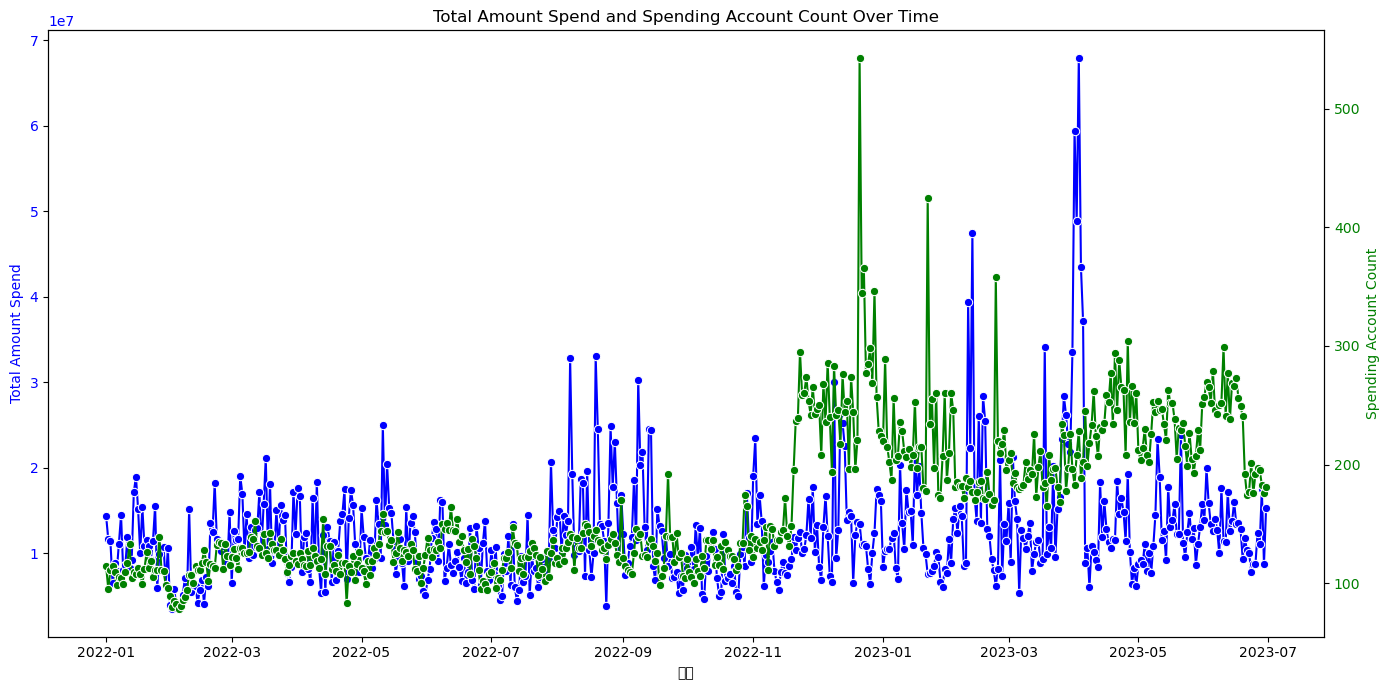

In [1387]:
# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot total amount spend on the primary y-axis
sns.lineplot(data=Q3_df1, x='日期', y='total_amount_spend', ax=ax1, color='blue', marker='o')
ax1.set_ylabel('Total Amount Spend', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot spending account count on the secondary y-axis
sns.lineplot(data=Q3_df1, x='日期', y='spending_account_count', ax=ax2, color='green', marker='o')
ax2.set_ylabel('Spending Account Count', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set the title and show the plot
plt.title('Total Amount Spend and Spending Account Count Over Time')
plt.xlabel('Date')
fig.tight_layout()  # Adjust layout to make room for both y-axis labels
plt.show()

In [1389]:
Q3_df2 = df.groupby('帳號').agg(
    花費金額合計=('花費金額', 'sum'),
    first_pay_date=('日期', 'min'),
).reset_index()

Q3_df2 = Q3_df2.groupby('first_pay_date').agg(
    Account=('帳號', 'count'),
).reset_index()

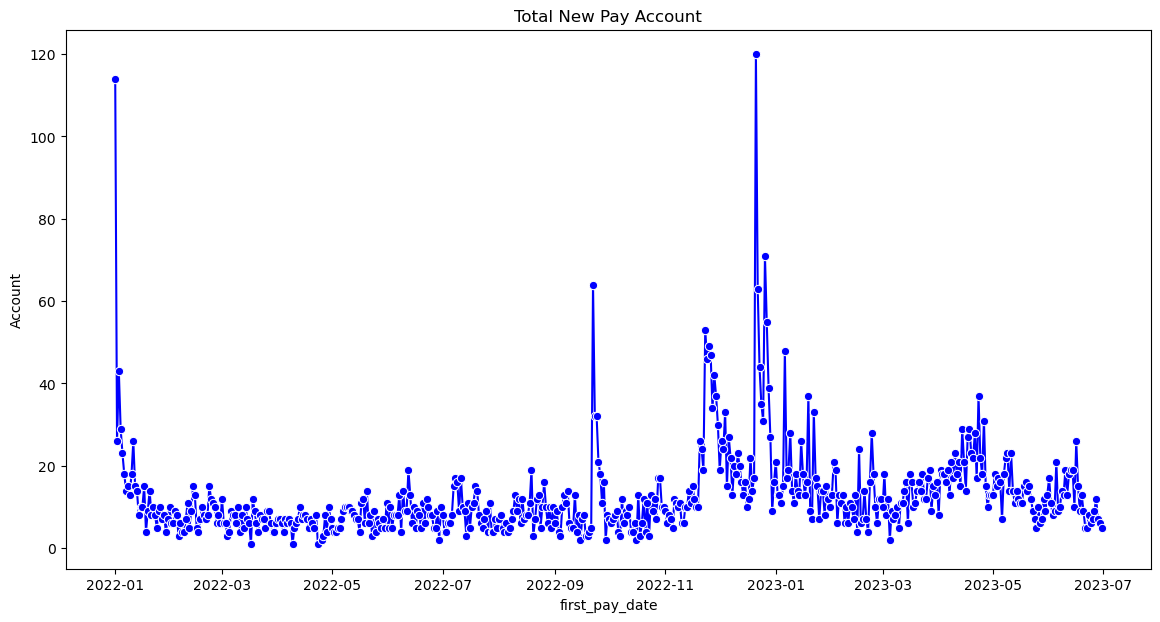

In [1391]:
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.lineplot(data=Q3_df2, x='first_pay_date', y = 'Account', color='blue', marker='o')
plt.title('Total New Pay Account')

plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.lineplot(data=Q3_df1, x='first_pay_date', y = 'Account', color='blue', marker='o')
plt.title('Total New Pay Account')

plt.show()

<Axes: xlabel='日期', ylabel='total_amount_spend'>

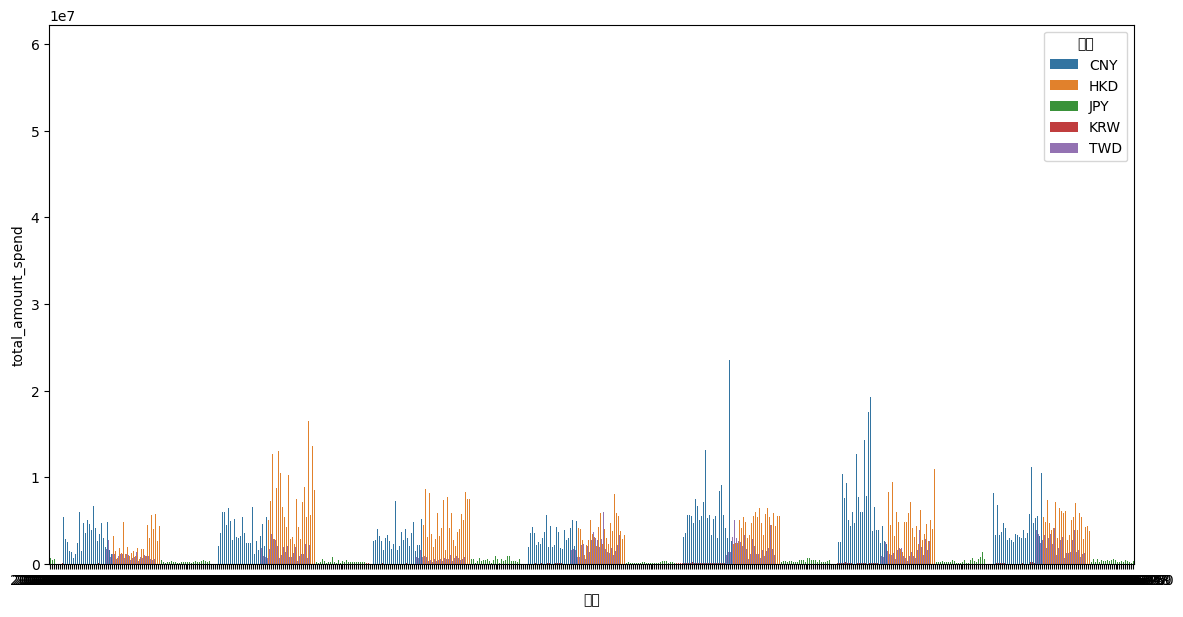

In [1448]:
Q4_df = df.copy()

fig, ax1 = plt.subplots(figsize=(14, 7))

Q4_df1 = Q4_df.groupby(["日期","貨幣"]).agg(
    spending_account_count=("帳號", "count"),
    total_amount_spend=("花費金額", "sum"), 
    total_loot_count=("轉蛋次數", "sum"),
    total_win_count=("中獎次數", "sum")
).reset_index()

sns.barplot(data=Q4_df1, y='total_amount_spend', x = '日期', hue = "貨幣")

<Axes: xlabel='日期', ylabel='total_amount_spend'>

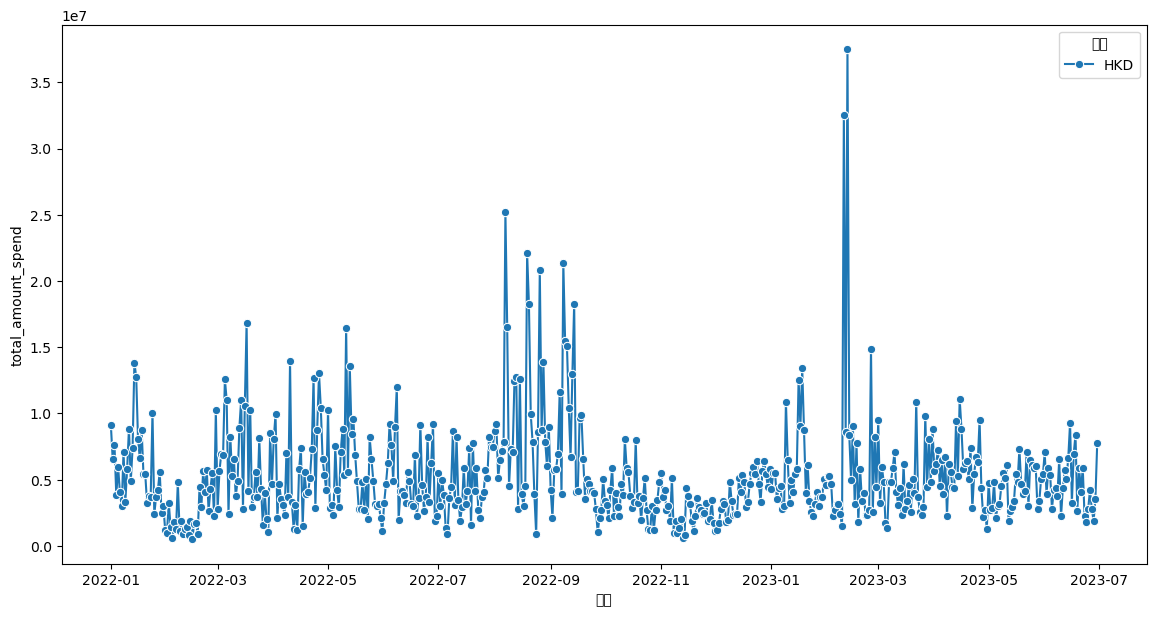

In [1436]:
# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 7))

sns.lineplot(data=Q4_df1[Q4_df1["貨幣"] == "HKD"], y='total_amount_spend', x = '日期', hue = "貨幣", marker='o')


In [1513]:
small_amt = df[df["花費金額"]< 100]
small_amt
d = small_amt.groupby("日期").agg(
    small_amt_order=("帳號", "count")
).reset_index()


Text(0.5, 1.0, 'Small Amount (<100twd) Order count')

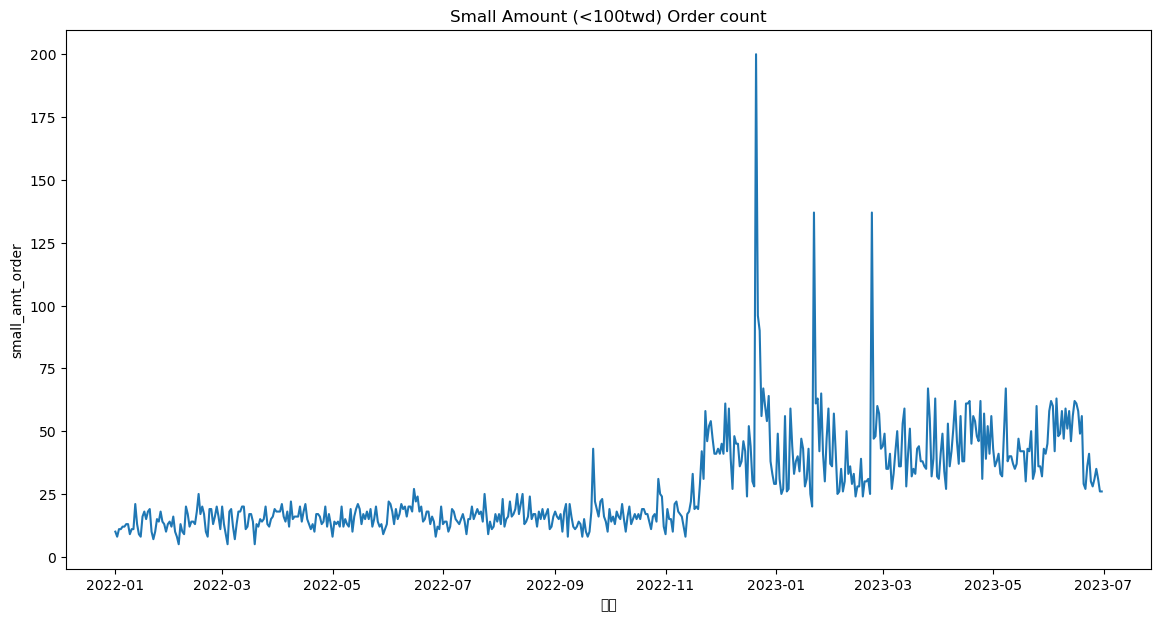

In [1523]:
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.lineplot(data = d, x = "日期", y = "small_amt_order")

plt.title("Small Amount (<100twd) Order count")

## Q4

In [1575]:
big_amt = df[df["花費金額"]> 30000]
big_amt
d = big_amt.groupby(["日期","貨幣"]).agg(
    big_amt=("帳號", "count")
).reset_index()

Text(0.5, 1.0, 'Large Amount (>30,000twd) Order count')

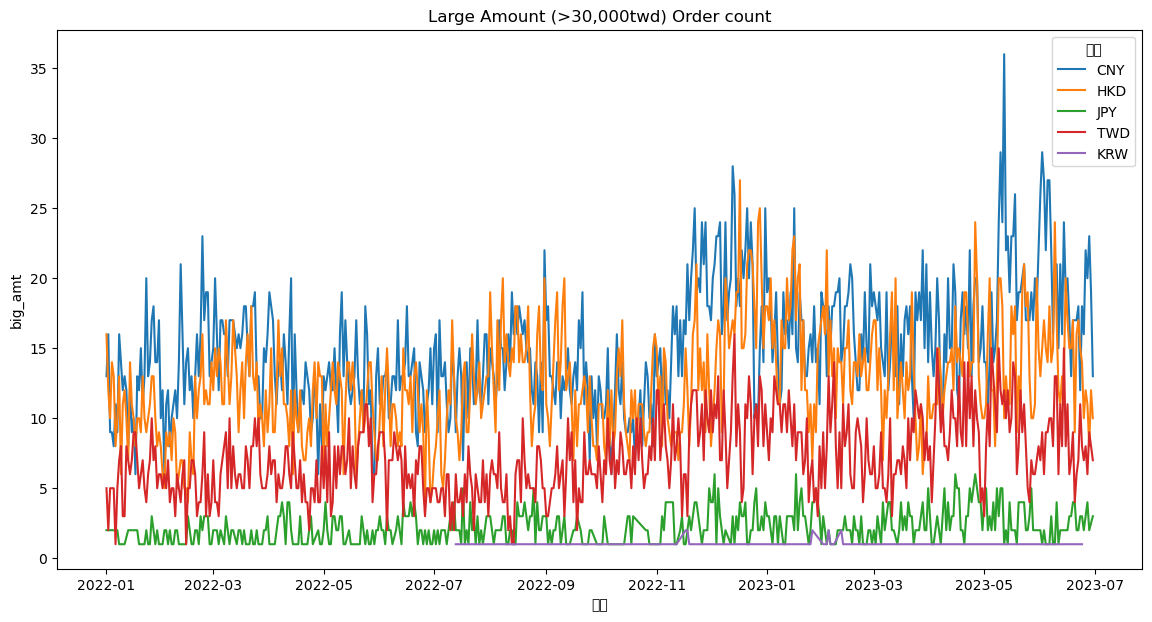

In [1577]:
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.lineplot(data = d, x = "日期", y = "big_amt", hue = "貨幣")

plt.title("Large Amount (>30,000twd) Order count")

In [1579]:
small_amt = df[df["花費金額"]<100]
small_amt
d = small_amt.groupby(["日期","貨幣"]).agg(
    small_amt=("帳號", "count")
).reset_index()

Text(0.5, 1.0, 'Small Amount (<100) Order count')

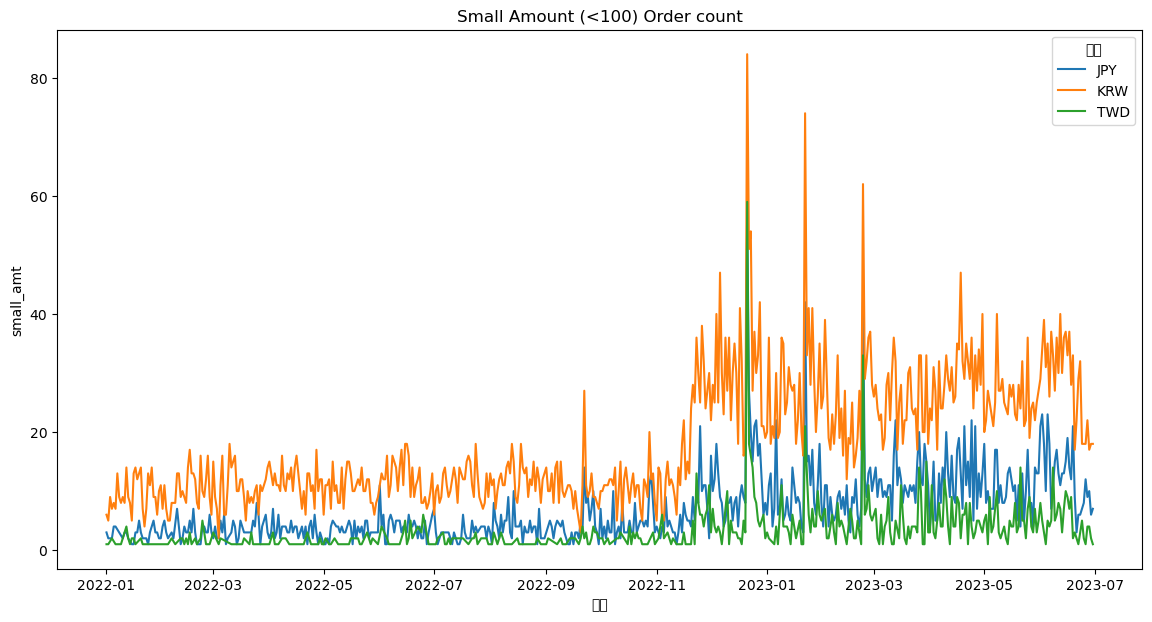

In [1581]:
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.lineplot(data = d, x = "日期", y = "small_amt", hue = "貨幣")

plt.title("Small Amount (<100) Order count")